In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
# Load the dataset
data_path = 'EVChargingStationUsage.csv'  # Update this path if needed
data = pd.read_csv(data_path)

/var/folders/m7/5qwtqvds6bs3g6xjkfmmxmqr0000gn/T/ipykernel_95537/1789357619.py:3: DtypeWarning: Columns (29,30,32) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(data_path)


In [3]:
# Ensure `data` is valid
print(type(data))  # Confirm it's a DataFrame

<class 'pandas.core.frame.DataFrame'>


In [4]:
# Display the first few rows of the dataset
data.head()

,Station Name,MAC Address,Org Name,Start Date,Start Time Zone,End Date,End Time Zone,Transaction Date (Pacific Time),Total Duration (hh:mm:ss),Charging Time (hh:mm:ss),...,Longitude,Currency,Fee,Ended By,Plug In Event Id,Driver Postal Code,User ID,County,System S/N,Model Number
0,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,7/29/2011 20:17,PDT,7/29/2011 23:20,PDT,7/29/2011 23:20,3:03:32,1:54:03,...,-122.160309,USD,0.0,Plug Out at Vehicle,3,95124.0,3284.0,NaN,NaN,NaN
1,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,7/30/2011 0:00,PDT,7/30/2011 0:02,PDT,7/30/2011 0:02,0:02:06,0:01:54,...,-122.160309,USD,0.0,Customer,4,94301.0,4169.0,NaN,NaN,NaN
2,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,7/30/2011 8:16,PDT,7/30/2011 12:34,PDT,7/30/2011 12:34,4:17:32,4:17:28,...,-122.160309,USD,0.0,Plug Out at Vehicle,5,94301.0,4169.0,NaN,NaN,NaN
3,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,7/30/2011 14:51,PDT,7/30/2011 16:55,PDT,7/30/2011 16:55,2:03:24,2:02:58,...,-122.160309,USD,0.0,Customer,6,94302.0,2545.0,NaN,NaN,NaN
4,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,7/30/2011 18:51,PDT,7/30/2011 20:03,PDT,7/30/2011 20:03,1:11:24,0:43:54,...,-122.160309,USD,0.0,Plug Out at Vehicle,7,94043.0,3765.0,NaN,NaN,NaN


In [5]:
# Check for missing values
missing_values = data.isnull().sum()
print("Missing values per column:\n", missing_values)

Missing values per column:
 Station Name                           0
MAC Address                            0
Org Name                               0
Start Date                             0
Start Time Zone                        0
End Date                               0
End Time Zone                          0
Transaction Date (Pacific Time)      209
Total Duration (hh:mm:ss)              0
Charging Time (hh:mm:ss)               0
Energy (kWh)                           0
GHG Savings (kg)                       0
Gasoline Savings (gallons)             0
Port Type                              9
Port Number                            0
Plug Type                              0
EVSE ID                            78948
Address 1                              0
City                                   0
State/Province                         0
Postal Code                            0
Country                                0
Latitude                               0
Longitude                    

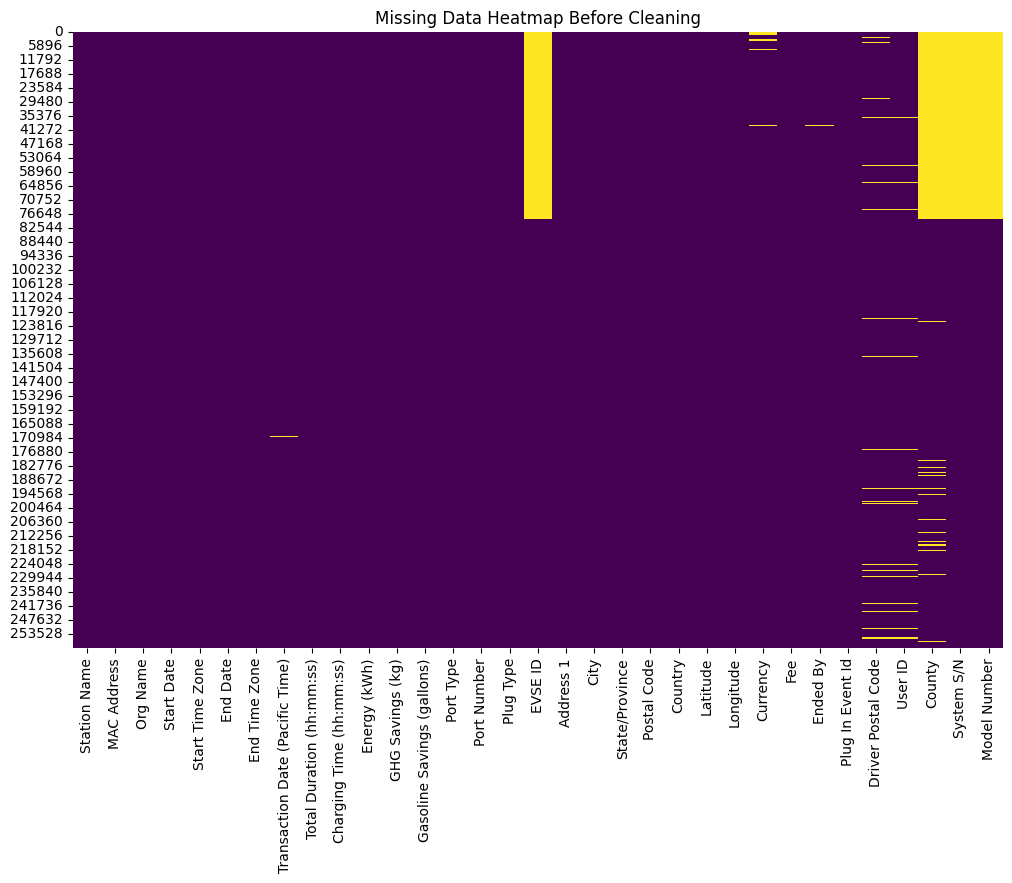

In [6]:
# Visualize missing data with a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Data Heatmap Before Cleaning")
plt.show()

In [7]:
# Data cleaning
# 1. Convert date columns to datetime objects
data['Start Date'] = pd.to_datetime(data['Start Date'], errors='coerce')
data['End Date'] = pd.to_datetime(data['End Date'], errors='coerce')
data['Transaction Date (Pacific Time)'] = pd.to_datetime(data['Transaction Date (Pacific Time)'], errors='coerce')

# 2. Handle missing values

In [8]:
# Replace missing categorical values
categorical_columns = ['County', 'Port Type', 'Plug Type', 'Org Name', 'Currency', 'Ended By']
for col in categorical_columns:
    data[col] = data[col].fillna('Not Specified')

In [9]:
# Replace missing numerical values
numerical_columns = ['Energy (kWh)', 'Fee', 'GHG Savings (kg)', 'Gasoline Savings (gallons)', 'EVSE ID', 'Driver Postal Code']
for col in numerical_columns:
    data[col] = data[col].fillna(data[col].median())

In [10]:
# Drop rows with missing values in critical columns
data.dropna(subset=['User ID', 'Start Date', 'End Date', 'Transaction Date (Pacific Time)'], inplace=True)

In [11]:
# Sort data by User ID and Start Date
data.sort_values(by=['User ID', 'Start Date'], inplace=True)

In [12]:
# Check for missing values after combining
missing_values_after_combining = data.isnull().sum()
print("Missing values after combining by User ID:\n", missing_values_after_combining)

Missing values after combining by User ID:
 Station Name                           0
MAC Address                            0
Org Name                               0
Start Date                             0
Start Time Zone                        0
End Date                               0
End Time Zone                          0
Transaction Date (Pacific Time)        0
Total Duration (hh:mm:ss)              0
Charging Time (hh:mm:ss)               0
Energy (kWh)                           0
GHG Savings (kg)                       0
Gasoline Savings (gallons)             0
Port Type                              0
Port Number                            0
Plug Type                              0
EVSE ID                                0
Address 1                              0
City                                   0
State/Province                         0
Postal Code                            0
Country                                0
Latitude                               0
Longitude    

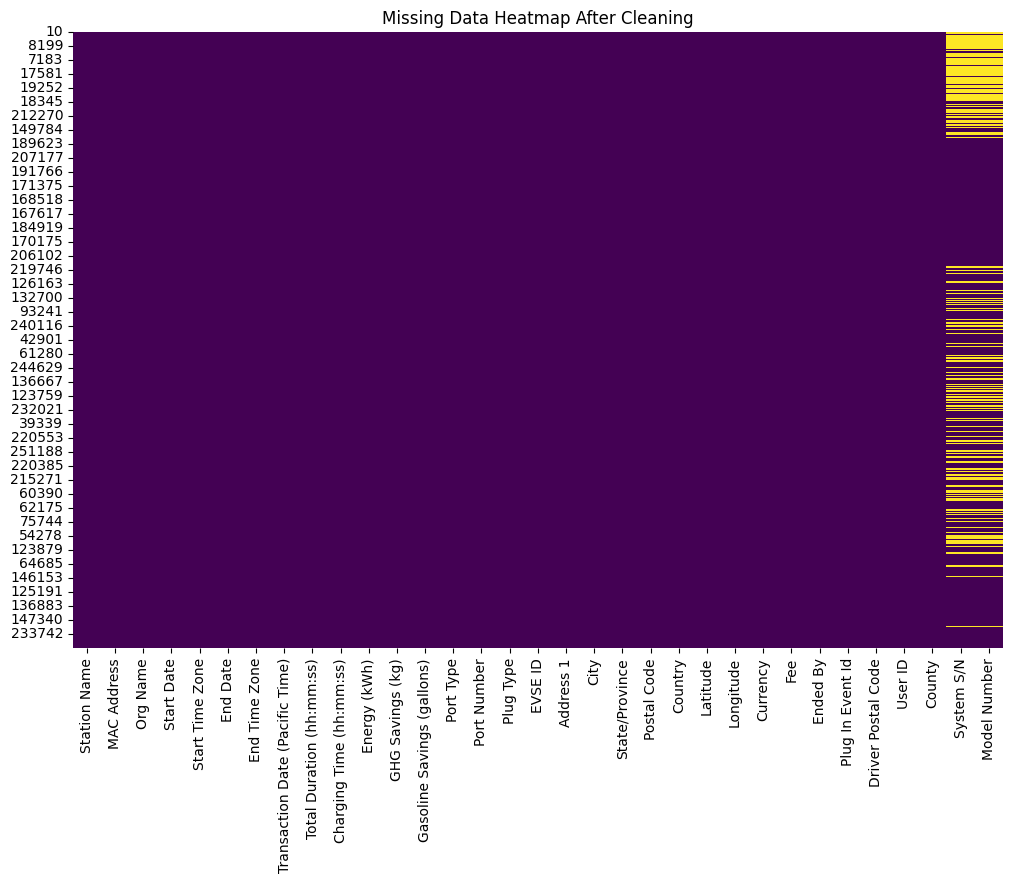

In [13]:
# Visualize missing data after cleaning with a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Data Heatmap After Cleaning")
plt.show()

In [14]:
# Save the cleaned
data.to_csv('cleaned_EVChargingStationUsage.csv', index=False)

In [15]:
cleaned_data_path = 'cleaned_EVChargingStationUsage.csv'  # Update this path if needed
data = pd.read_csv(cleaned_data_path)
data

/var/folders/m7/5qwtqvds6bs3g6xjkfmmxmqr0000gn/T/ipykernel_95537/2583401971.py:2: DtypeWarning: Columns (29) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(cleaned_data_path)


,Station Name,MAC Address,Org Name,Start Date,Start Time Zone,End Date,End Time Zone,Transaction Date (Pacific Time),Total Duration (hh:mm:ss),Charging Time (hh:mm:ss),...,Longitude,Currency,Fee,Ended By,Plug In Event Id,Driver Postal Code,User ID,County,System S/N,Model Number
0,PALO ALTO CA / HAMILTON #2,000D:6F00:009E:D39E,City of Palo Alto,2011-08-02 12:26:00,PDT,2011-08-02 13:27:00,PDT,2011-08-02 13:27:00,1:00:50,1:00:43,...,-122.160263,USD,0.00,Plug Out at Vehicle,8,94304.0,0.0,Not Specified,NaN,NaN
1,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,2011-08-04 20:13:00,PDT,2011-08-04 23:11:00,PDT,2011-08-04 23:11:00,2:58:33,2:57:27,...,-122.160309,USD,0.00,Plug Out at Vehicle,19,94304.0,0.0,Not Specified,NaN,NaN
2,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,2011-08-08 16:27:00,PDT,2011-08-08 18:11:00,PDT,2011-08-08 18:11:00,1:43:24,1:43:18,...,-122.160309,Not Specified,0.00,Plug Out at Vehicle,1312846070,94304.0,0.0,Not Specified,NaN,NaN
3,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,2011-08-18 11:59:00,PDT,2011-08-18 13:42:00,PDT,2011-08-18 13:42:00,2:24:23,1:42:53,...,-122.160309,Not Specified,0.00,Plug Out at Vehicle,53,94304.0,0.0,Not Specified,NaN,NaN
4,PALO ALTO CA / HAMILTON #2,000D:6F00:009E:D39E,City of Palo Alto,2011-08-27 13:42:00,PDT,2011-08-27 15:36:00,PDT,2011-08-27 15:36:00,1:53:25,1:53:13,...,-122.160263,Not Specified,0.00,Plug Out at Vehicle,1314477764,94304.0,0.0,Not Specified,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251503,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,2019-08-02 16:50:00,PDT,2019-08-02 19:01:00,PDT,2019-08-02 19:01:00,2:11:00,2:10:50,...,-122.160370,USD,1.40,Plug Out at Vehicle,15858,95138.0,99943,Santa Clara County,1.119100e+11,CT2100-HD-CDMA-CCR
251504,PALO ALTO CA / HAMILTON #2,0024:B100:0002:965D,City of Palo Alto,2019-08-16 16:53:00,PDT,2019-08-16 18:54:00,PDT,2019-08-16 18:55:00,2:00:58,2:00:45,...,-122.160324,USD,1.31,Plug Out at Vehicle,6356,95138.0,99943,Santa Clara County,1.739410e+11,CT4020-HD-GW
251505,PALO ALTO CA / HAMILTON #2,0024:B100:0002:965D,City of Palo Alto,2019-10-11 17:01:00,PDT,2019-10-11 18:40:00,PDT,2019-10-11 18:42:00,1:39:06,1:38:35,...,-122.160324,USD,1.06,Plug Out at Vehicle,6970,95138.0,99943,Santa Clara County,1.739410e+11,CT4020-HD-GW
251506,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,2019-11-22 16:32:00,PST,2019-11-22 18:46:00,PST,2019-11-22 18:46:00,2:14:16,2:14:01,...,-122.160370,USD,1.42,Plug Out at Vehicle,16453,95138.0,99943,Santa Clara County,1.119100e+11,CT2100-HD-CDMA-CCR


In [16]:
# Ensure `data` is valid
print(type(data))  # Confirm it's a DataFrame

<class 'pandas.core.frame.DataFrame'>


In [17]:
data['Port Type']

0         Level 2
1         Level 2
2         Level 2
3         Level 2
4         Level 2
           ...   
251503    Level 2
251504    Level 2
251505    Level 2
251506    Level 2
251507    Level 2
Name: Port Type, Length: 251508, dtype: object

## Handling user ID
---

# Exploratory Data Analysis (EDA)
---

#### Visualizing Key Features

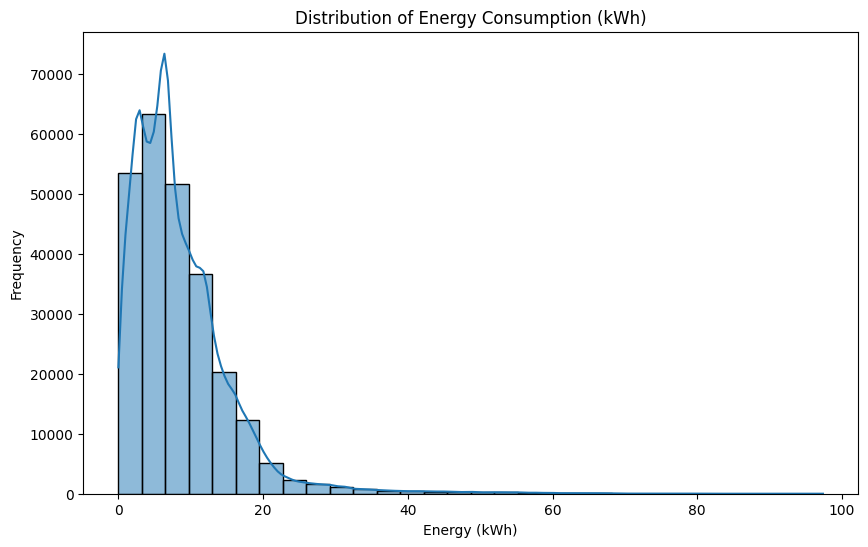

In [18]:
# 1. Histogram for Energy (kWh)
plt.figure(figsize=(10, 6))
sns.histplot(data['Energy (kWh)'], bins=30, kde=True)
plt.title('Distribution of Energy Consumption (kWh)')
plt.xlabel('Energy (kWh)')
plt.ylabel('Frequency')
plt.show()

In [19]:
# Create a sample DataFrame with charging time data in seconds
charging_data = pd.DataFrame({
    'Charging Time (seconds)': np.random.exponential(scale=1e6, size=1000)  # Example data
})

# Convert charging times from seconds to hours
charging_data['Charging Time (hours)'] = charging_data['Charging Time (seconds)'] / 3600

# Calculate mean and median in hours
mean_charging_time = charging_data['Charging Time (hours)'].mean()
median_charging_time = charging_data['Charging Time (hours)'].median()

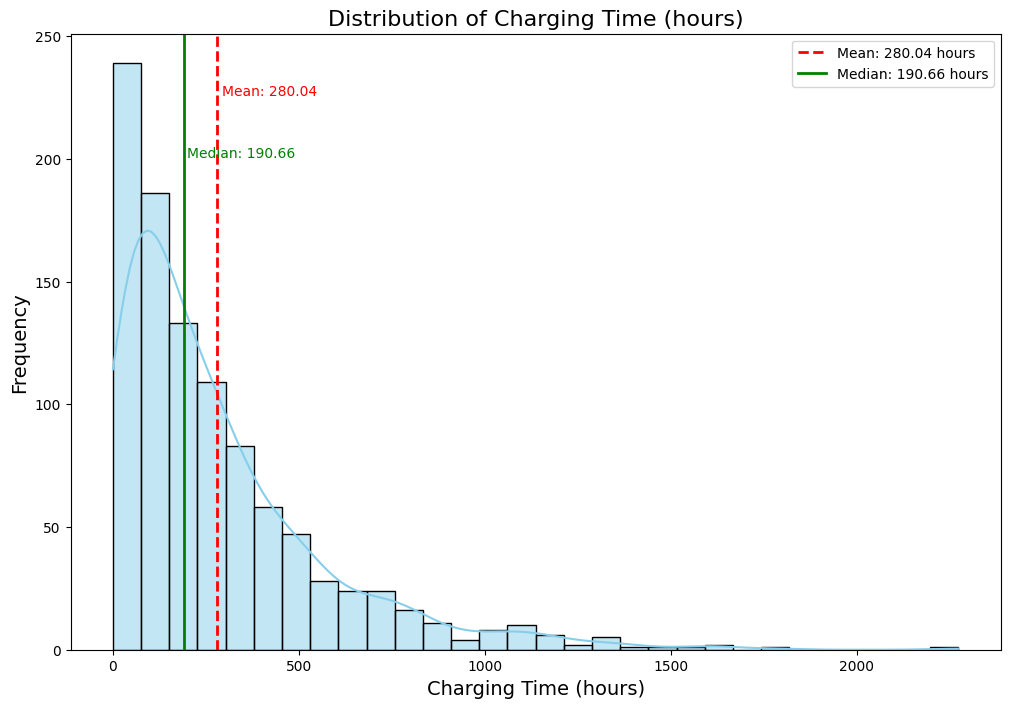

In [20]:
# Create the plot
plt.figure(figsize=(12, 8))
sns.histplot(charging_data['Charging Time (hours)'], bins=30, kde=True, color='skyblue')

# Add mean and median lines
plt.axvline(mean_charging_time, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_charging_time:.2f} hours')
plt.axvline(median_charging_time, color='green', linestyle='-', linewidth=2, label=f'Median: {median_charging_time:.2f} hours')

# Add annotations
plt.text(mean_charging_time + mean_charging_time * 0.05, plt.ylim()[1] * 0.9, f'Mean: {mean_charging_time:.2f}', color='red')
plt.text(median_charging_time + median_charging_time * 0.05, plt.ylim()[1] * 0.8, f'Median: {median_charging_time:.2f}', color='green')

# Add titles and labels
plt.title('Distribution of Charging Time (hours)', fontsize=16)
plt.xlabel('Charging Time (hours)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.legend()

# Show the plot
plt.show()

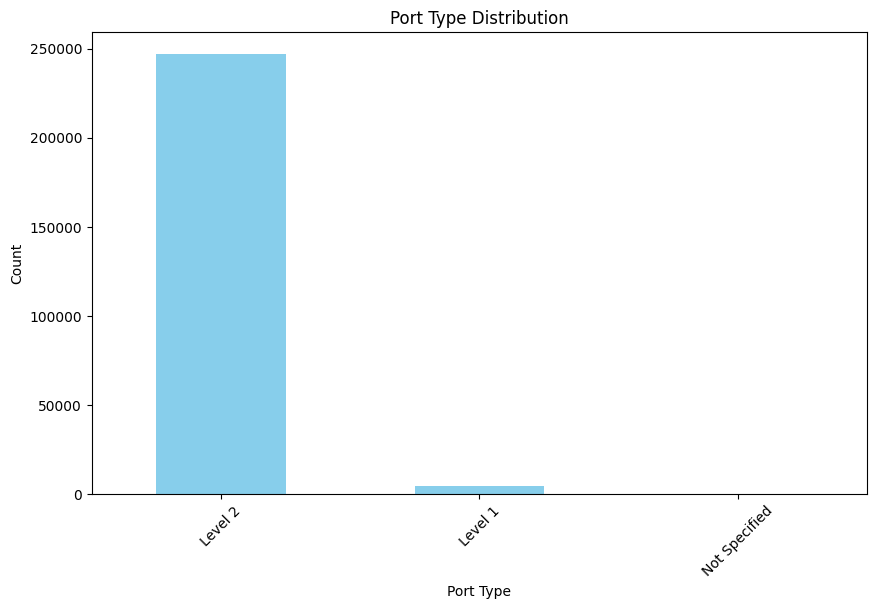

In [21]:
# 3. Bar chart for Port Type
if 'Port Type' in data.columns:
	plt.figure(figsize=(10, 6))
	data['Port Type'].value_counts().plot(kind='bar', color='skyblue')
	plt.title('Port Type Distribution')
	plt.xlabel('Port Type')
	plt.ylabel('Count')
	plt.xticks(rotation=45)
	plt.show()
else:
	print("Column 'Port Type' does not exist in the DataFrame.")

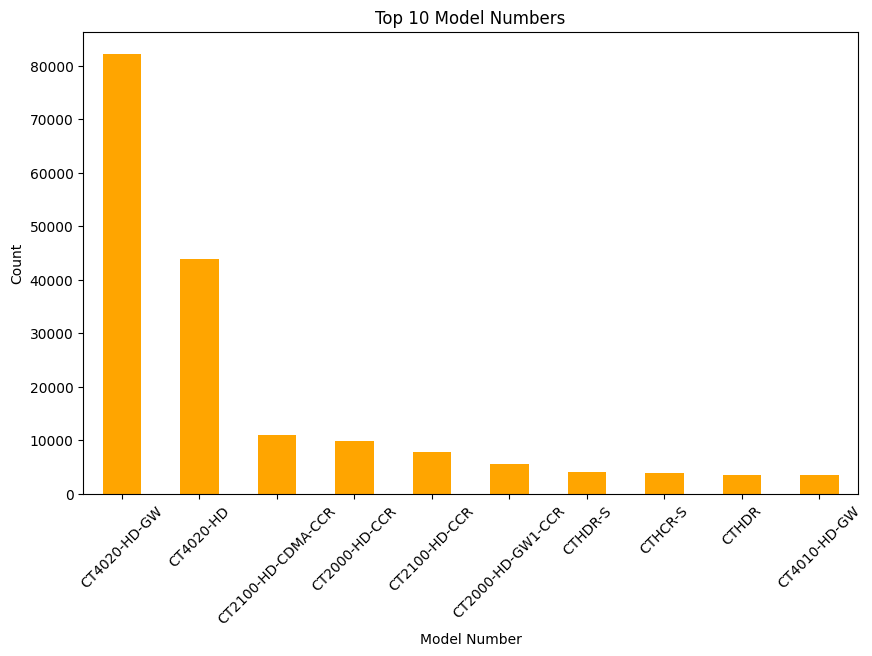

In [22]:
# 4. Bar chart for Model Number
plt.figure(figsize=(10, 6))
data['Model Number'].value_counts().nlargest(10).plot(kind='bar', color='orange')
plt.title('Top 10 Model Numbers')
plt.xlabel('Model Number')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

#### Time-Based Trends

In [23]:
# Extract relevant time features
data['Hour'] = data['Start Date'].dt.hour
data['Weekday'] = data['Start Date'].dt.weekday
data['Weekend'] = data['Weekday'].apply(lambda x: 'Weekend' if x >= 5 else 'Weekday')

AttributeError: Can only use .dt accessor with datetimelike values

In [ ]:
# 1. Hourly Usage Patterns
plt.figure(figsize=(10, 6))
sns.lineplot(data=data, x='Hour', y='Energy (kWh)', ci=None)
plt.title('Hourly Energy Consumption')
plt.xlabel('Hour of Day')
plt.ylabel('Average Energy (kWh)')
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()

/var/folders/m7/5qwtqvds6bs3g6xjkfmmxmqr0000gn/T/ipykernel_95176/95803350.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=data, x='Hour', y='Energy (kWh)', ci=None)


ValueError: Could not interpret value `Hour` for `x`. An entry with this name does not appear in `data`.

<Figure size 1000x600 with 0 Axes>

In [ ]:
# 2. Weekday vs Weekend
weekday_energy = data.groupby('Weekend')['Energy (kWh)'].mean()

plt.figure(figsize=(8, 6))
weekday_energy.plot(kind='bar', color=['green', 'blue'])
plt.title('Average Energy Consumption: Weekday vs Weekend')
plt.xlabel('Day Type')
plt.ylabel('Average Energy (kWh)')
plt.xticks(rotation=0)
plt.show()

KeyError: 'Weekend'

## **Mandatory Component**
---

### **1: Cluster**

- Night vs day
- Weekday vs weekend
- Morning vs afternoon vs evening
- Location (longitude x latitude)
- Model number
- Port type
- Start time and end time
- plug and unplug
- end time vs unpluged 
- Er der en større opladning alt efter hvor du bor i landet 
- Hvilke systemtype er mest populær
- 

### **2: Prediction model**

## **Exploratory Component**
---

### **1: Infrastructure planning**

### **2: Campaigns to increase**

# **Conclusions**
---

# **Word Count**
---

In [ ]:
import json

with open('Project.ipynb') as json_file:
    data = json.load(json_file)

print(data)

{'cells': [{'cell_type': 'markdown', 'metadata': {}, 'source': ['# **Imports**\n', '---']}, {'cell_type': 'code', 'execution_count': 229, 'metadata': {}, 'outputs': [], 'source': ['import numpy as np\n', 'import pandas as pd\n', 'import matplotlib.pyplot as plt\n', 'from datetime import datetime, timedelta']}, {'cell_type': 'markdown', 'metadata': {}, 'source': ['# **Introduction + Data analysis and visualization**\n', '---']}, {'cell_type': 'markdown', 'metadata': {}, 'source': ['- Start time and end time\n', '- plug and unplug\n', '- end time vs unpluged \n', '- ']}, {'cell_type': 'code', 'execution_count': 230, 'metadata': {}, 'outputs': [{'name': 'stderr', 'output_type': 'stream', 'text': ['/var/folders/nd/td49stzx1sb1x3vskq7xg2540000gn/T/ipykernel_1641/48901969.py:1: DtypeWarning: Columns (29,30,32) have mixed types. Specify dtype option on import or set low_memory=False.\n', "  data = pd.read_csv('EVChargingStationUsage.csv')\n"]}], 'source': ["data = pd.read_csv('EVChargingStati

In [ ]:
wordCount = 0
for each in data['cells']:
    cellType = each['cell_type']
    if cellType == "markdown":
        content = each['source']
        for line in content:
            temp = [word for word in line.split() if "#" not in word] # we might need to filter for more markdown keywords here
            wordCount = wordCount + len(temp)
            
print(wordCount)

73
